In [1]:
%matplotlib inline

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  6.28318531e+00
  3.93963279e-05 -3.93963279e+01 -0.00000000e+00 -0.00000000e+00]


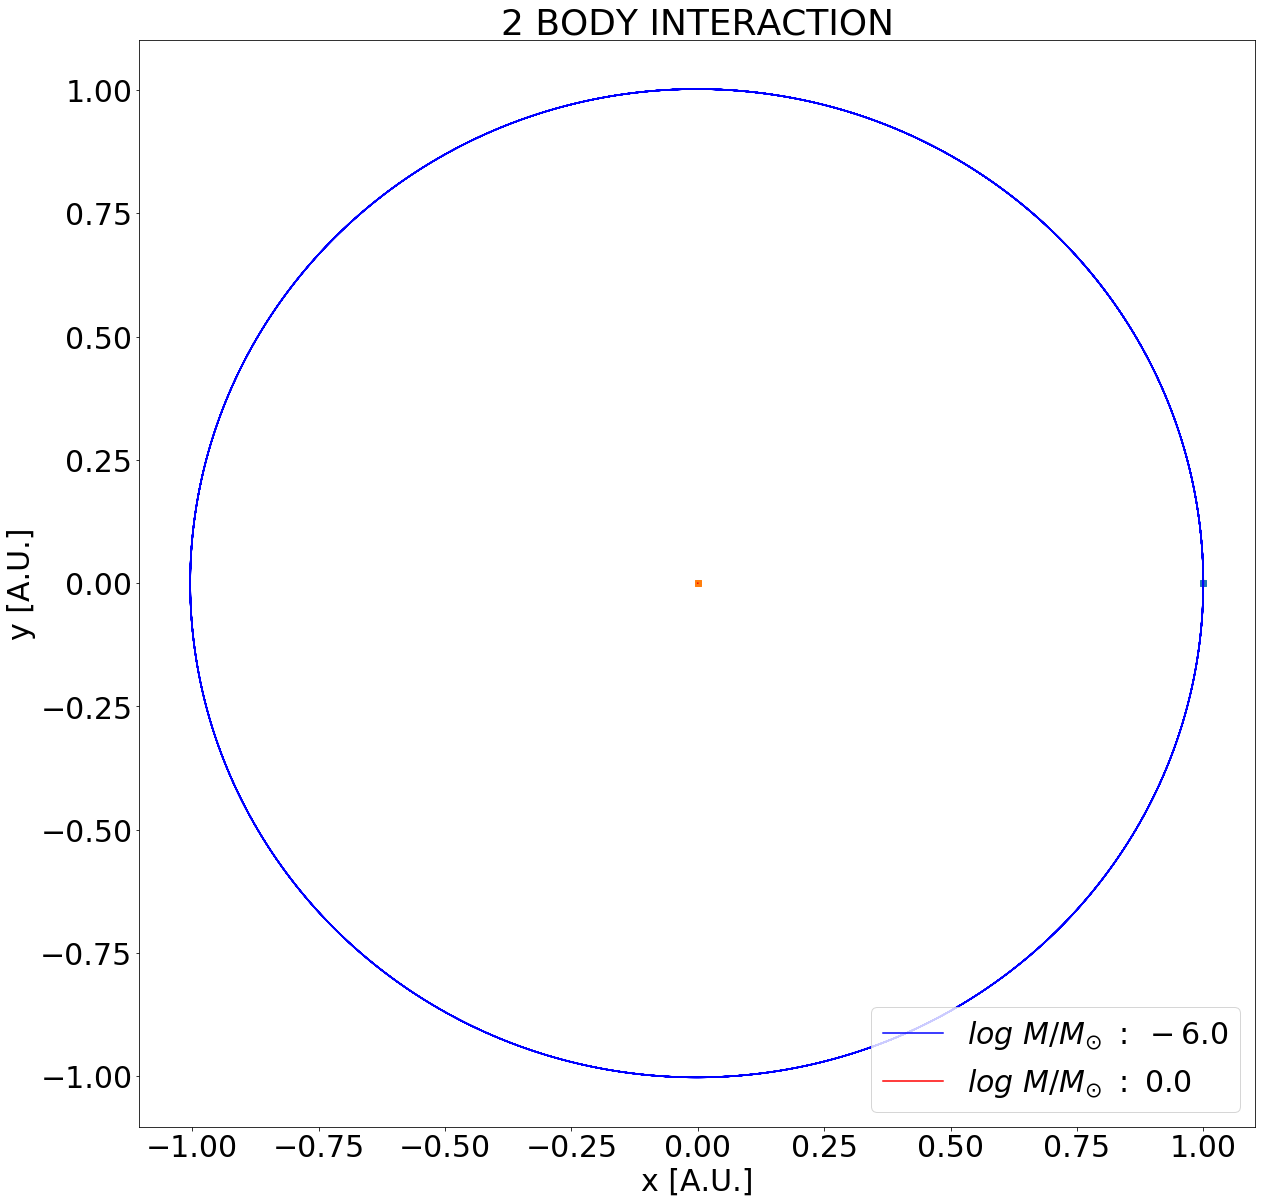

In [2]:
# %load course_materials/ODE1.py
#python>=3.7.2
#this program calculates and plots the orbits of 2 point sources interacting only gravitationally, integrating the equation of motion with the scipy package "odeint"


#modules needed
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.integrate import odeint


#define the differential system d(r_i,v_i)/dt
def dAdt(data,t):
    
    d12=np.linalg.norm([data[1]-data[0],data[2]-data[3]])
    
    datadot=np.zeros(len(data)) 
    
    datadot[0]=data[4]
    datadot[1]=data[5]

    datadot[2]=data[6]
    datadot[3]=data[7]

    datadot[4]=-G*m[1]*(data[0]-data[1])/((d12+eps)**3) 
    datadot[5]=-G*m[0]*(data[1]-data[0])/((d12+eps)**3) 

    datadot[6]=-G*m[1]*(data[2]-data[3])/((d12+eps)**3) 
    datadot[7]=-G*m[0]*(data[3]-data[2])/((d12+eps)**3) 
        
    if t == 0: print(datadot) 
    
    return datadot 





#changing units of measurement (A.U.=1, year=1, Msun=1)
Kg=1./(1.988E+30)
m=1./(1.496E11)
s=1./(3.153E+07)
G=(6.674E-11)*(m**3)*(Kg**-1)*(s**-2)



#generate random initial positions and velocities for the 2 bodies
x1=0.
x2=1.

y1=0.
y2=0.

eh_th = 0 #np.pi/2/90*80

vx1=0.
vx2=2*np.pi*np.sin(eh_th)


vy1=0
vy2=2*np.pi*np.cos(eh_th)



#masses (in solar unit)
m=[1.,1E-6]

#store all the data in a single list
data0=[x1,x2,y1,y2,vx1,vx2,vy1,vy2] #[x],[y],[vx],[vy]

#softening parameter (to avoid divergent forces)
eps=1.E-10 

#time vector
t=np.linspace(0,2*np.pi,10000)  

#solution from odeint as a datacube
sol=odeint(dAdt,data0,t)  

#set general fontsize
plt.rc('font',size=30)

#create the figure
fig=plt.figure(1,figsize=(20,20))
#add axis
ax=fig.add_subplot(111)

#plot initial positions 
ax.scatter(sol[0,1],sol[0,3],marker='s',s=40)
ax.scatter(sol[0,0],sol[0,2],marker='s',s=40)

#plot the orbits
ax.plot(sol[:,1],sol[:,3],color='blue',label=r'$log\ M/M_{\odot}\ :\ %.1f\ $'%(math.log10(m[1])))
ax.plot(sol[:,0],sol[:,2],color='red',label=r'$log\ M/M_{\odot}\ :\ %.1f\ $'%(math.log10(m[0])))
plt.legend()

ax.set_xlabel('x [A.U.]')
ax.set_ylabel('y [A.U.]')
ax.set_title('2 BODY INTERACTION')
#save the figure
#plt.savefig('2body.png')

#show on screen
plt.show()

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  6.28318531e+00
  3.93963279e-05 -3.93963279e+01 -0.00000000e+00 -0.00000000e+00]


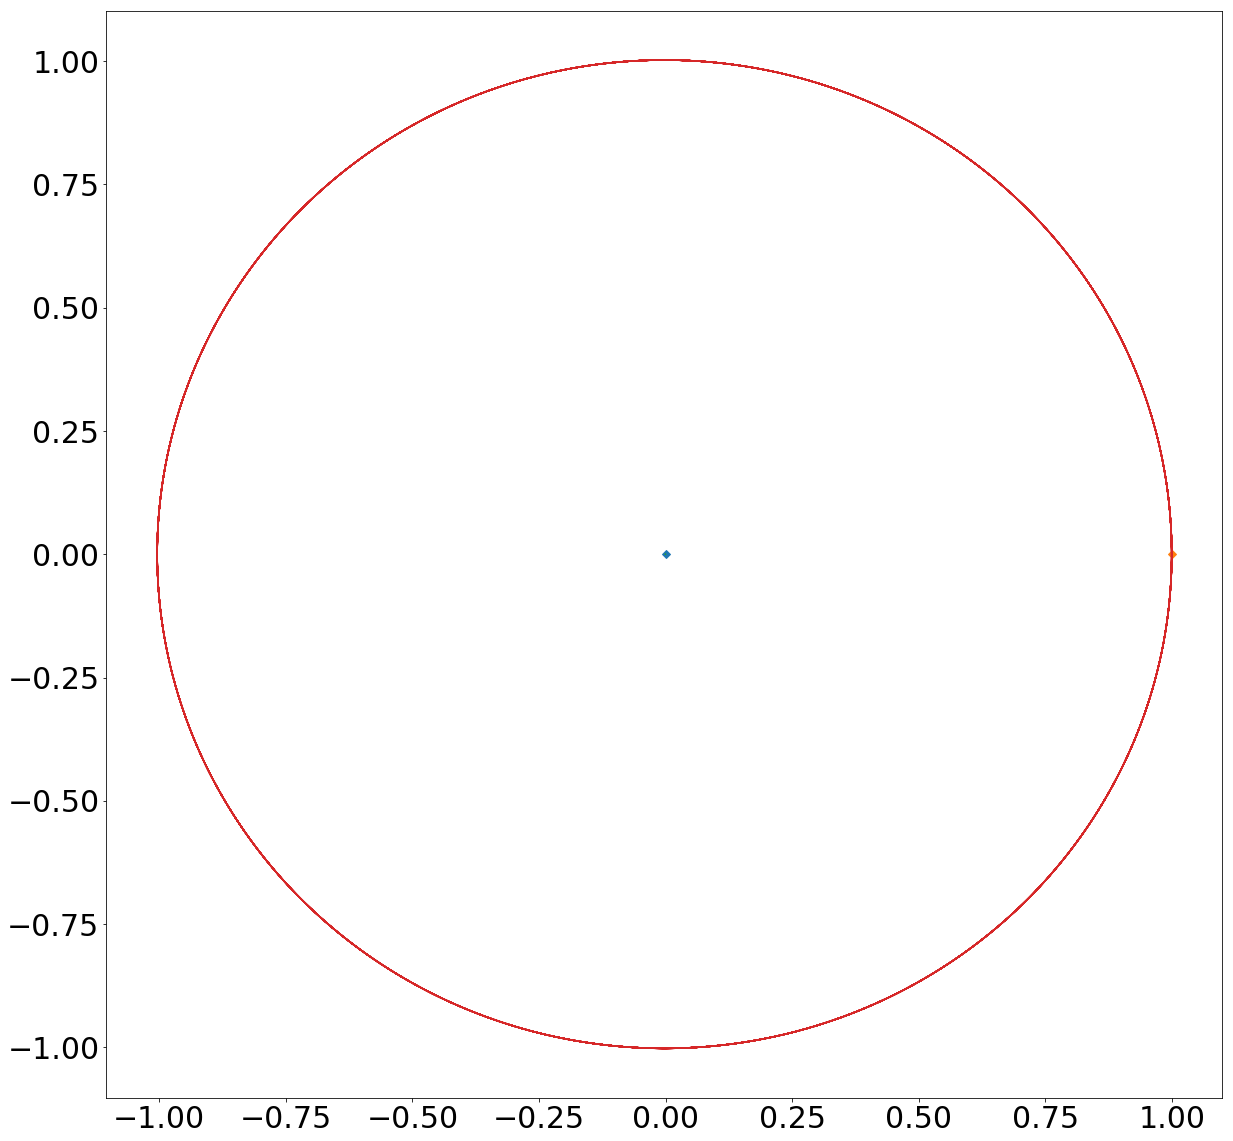

In [3]:
t=np.linspace(0,10,10000)
x=odeint(dAdt, data0,t).transpose()

fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.plot(x[0,0], x[2,0], 'D', x[1,0], x[3,0], 'D')
ax.plot(x[0], x[2], x[1], x[3])

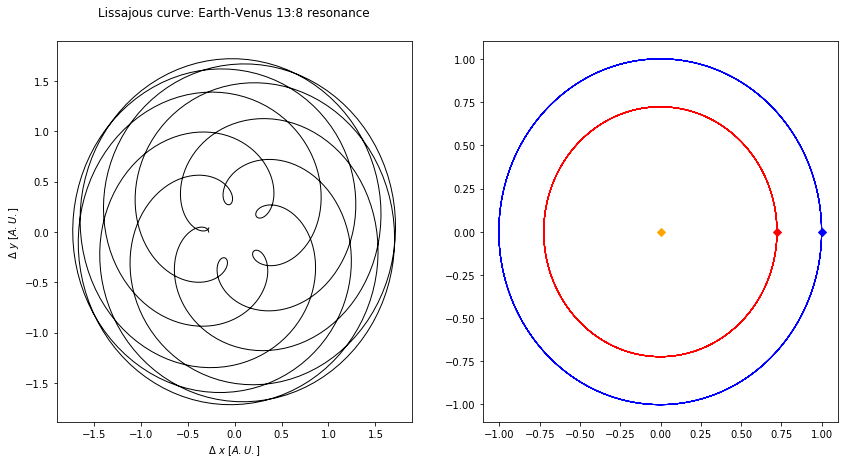

In [4]:
# %load course_materials/NBODY.py
#modules needed
import pylab
from matplotlib.pyplot import *
import math
import numpy
from scipy.integrate import odeint



#body_i acceleration :  direction k (being 2D x or y)

def a(i,k,data): #input: i=index of the body,k=direction (x or y), data=array with positions and velocities
    
    
    A=0. #starting with 0
    
    
    xi=data[4*i] #coordinates for body_i (x & y)
    yi=data[4*i+1]    
    arri=numpy.array([xi,yi]) #put coordinates together
    
    
    for j in range(0,len(bod)): #for every other body
    
        if j==i: #if the same index (same body)
            
            pass # A=A+0. #skip
            
        else:  
    
            
            
    
            xj=data[4*bod[j]] #body_j coordinates (x & y)
            yj=data[4*bod[j]+1]
    
            arrj=numpy.array([xj,yj])  #put coordinates together

            diff=arri-arrj #calculate distance ij
            dij=numpy.linalg.norm(diff) #modulus
            
    
            A= A - G*m[j]*(data[4*i+k]-data[4*j+k])/((dij+eps)**3) #and sum 
    
    #at the end we get the total acceleration (along direction k) for the body_i ONLY!
    return A 


def dAdt(data,t): #differential system
    
    
    datadot=numpy.zeros(len(data)) #define the differential system
    
    
    for k in range(0,2): #for each direction (x,y)
    
        for i in range(0,N): #for each body
    
            datadot[4*i+k+2]=a(i,k,data) #vdot_i=acc_i
            datadot[4*i+k]=data[4*i+k+2] #rdot_i=v_i
        
    
    return datadot 

#MAIN

#changing units (A.U.=1, year=1, Msun=1)

Kg=1./(1.988E+30)
m=1./(1.496E11)
s=1./(3.153E+07)
G=(6.674E-11)*(m**3)*(Kg**-1)*(s**-2)
pi=math.pi


#INPUT: NUMBER OF BODIES (TRY 3/4 MAXIMUM!)
N=3
#INPUT: MASSES 
m=[1,3.003E-06,2.447E-06]
#INPUT: INITIAL POSITIONS AND VELOCITIES
data0=[0,0,0,0, 1,0,0,2*pi, 0.723,0,0,1.175957*(2*pi)] #[x1,y1,vx1,vy1,     x2,y2,vx2,vy2,   ....]



#program
bod=numpy.arange(0,N,1) #index for each body (0 -> N-1)


eps=1.E-10 #softening parameter, to avoid divergences


t=numpy.linspace(0.,8.,1000)  #time vector
#t=numpy.linspace(0,16,10000)

sol=odeint(dAdt,data0,t)  #odeint solution


pylab.rc('font',size=10) #plot


dx=sol[:,8]-sol[:,4] #x_venus-x_earth
dy=sol[:,9]-sol[:,5] #y_venus-y_earth

fig = figure(figsize=(14,7))
ax = fig.add_subplot(121)
ax.plot(dx,dy,color='black',lw=1)

xlabel(r'$\Delta\ x \ [A.U.]$')
ylabel(r'$\Delta\ y \ [A.U.]$')
title('Lissajous curve: Earth-Venus 13:8 resonance',y=1.05)

c="orange blue red".split()
ax = fig.add_subplot(122)
for i in range(3):
    ax.plot(sol[0,0+i*4],sol[0,1+i*4],marker='D', color=c[i])
    ax.plot(sol[:,0+i*4],sol[:,1+i*4],lw=1, color=c[i])

show()

In [5]:
m[2] = 7.34767309e22 * Kg # the moon
ul = 1/388.6 # earth-moon distance
day = 60*60*24 * s
data0=[0,0,0,0,  # Sun
       1,0,0,2*pi, # Earth
       1+ul,0,0, 2*pi*(1 + ul/(27.321661*day))
      ] 
    #[x1,y1,vx1,vy1,     x2,y2,vx2,vy2,   ....]
t=numpy.linspace(0,2,10000)
eps = 1e-6
sol, _ = odeint(dAdt,data0, t, full_output=True)
data0[8:]

[1.0025733401955739, 0, 0, 6.499148729961601]

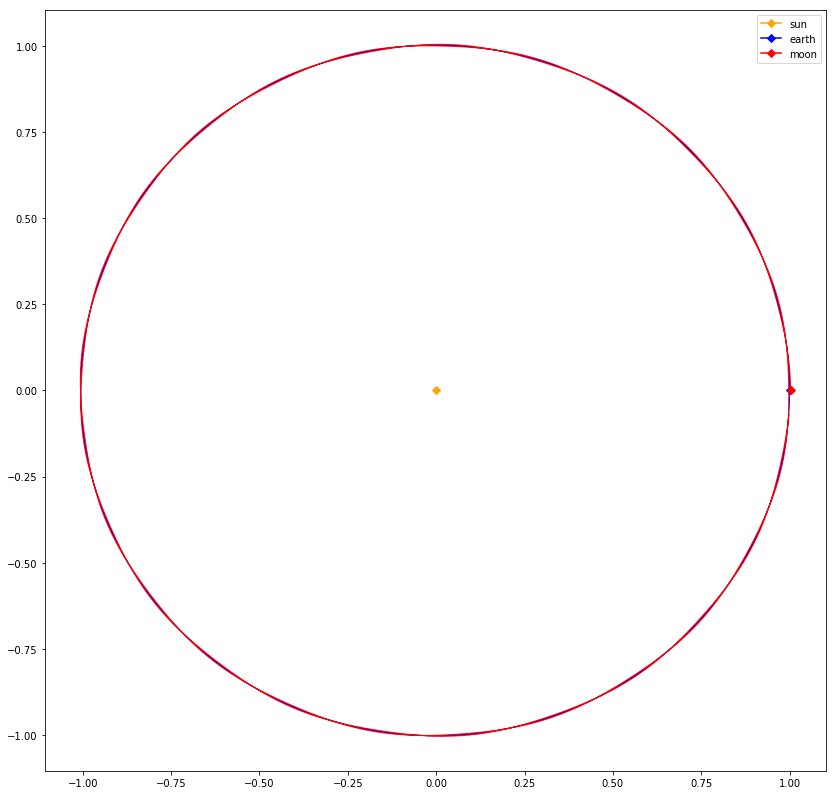

In [6]:
labels = "sun earth moon".split()
fig = figure(figsize=(14,14))
ax = fig.add_subplot(111)
for i in range(0,3):
    ax.plot(sol[0,0+i*4],sol[0,1+i*4],marker='D', color=c[i], label=labels[i])
    ax.plot(sol[:,0+i*4],sol[:,1+i*4],lw=1, color=c[i])
    ax.legend()
    show_earth_neighborhood = False
    if show_earth_neighborhood:
        dx=dy=10*ul
        ax.set_xlim(data0[4]-dx, data0[4]+dx)
        ax.set_ylim(data0[5]-dy, data0[5]+dy)

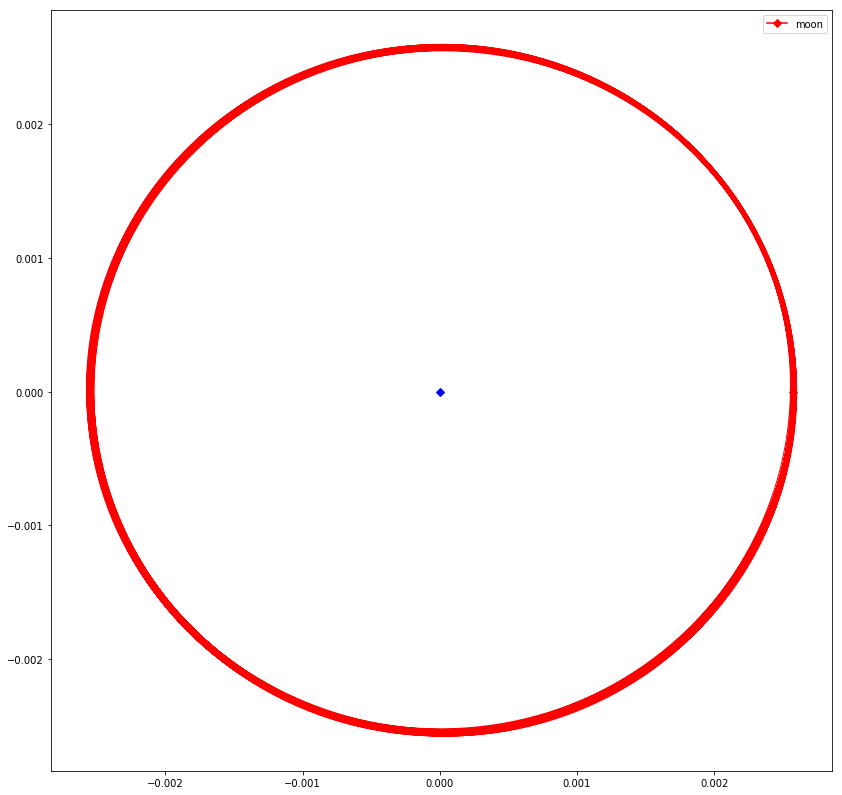

In [7]:
fig = figure(figsize=(14,14))
ax = fig.add_subplot(111)

ax.plot(sol[0,8]-sol[0,4],sol[0,9]-sol[0,5],marker='D', color=c[i], label=labels[i])
ax.plot(sol[:,8]-sol[:,4],sol[:,9]-sol[:,5],lw=1, color=c[i])
ax.plot(0,0,'bD')
ax.legend()

Text(0.5, 1.0, 'Earth-Moon distance')

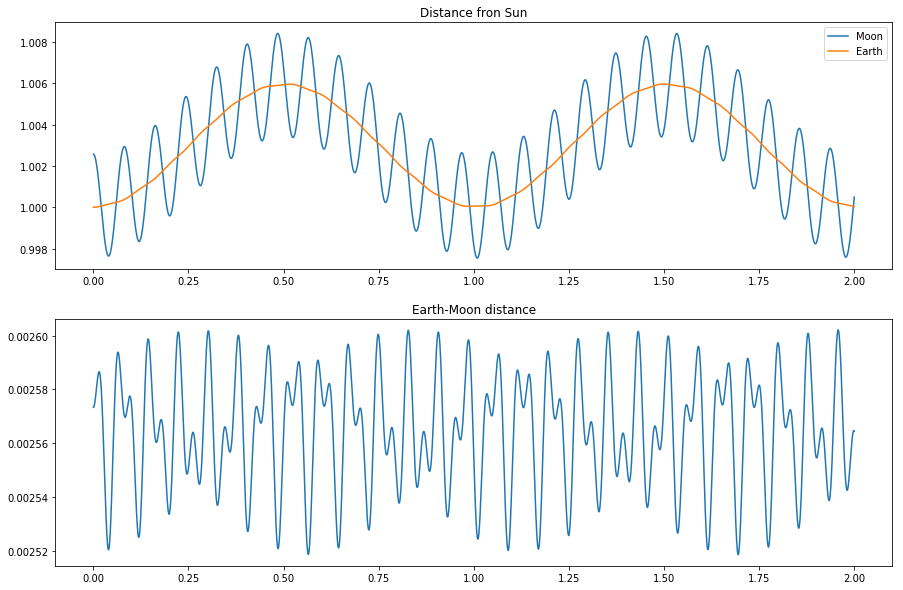

In [8]:
plt.rc("figure", figsize=(15,10))
def distance(a, b):
    d = {"sun": 0, "earth": 4, "moon": 8}
    return np.sqrt((sol[:,d[a]]-sol[:,d[b]])**2 + (sol[:,1+d[a]]-sol[:,1+d[b]])**2)


sun_moon_distance = np.sqrt((sol[:,0]-sol[:,8])**2 + (sol[:,1]-sol[:,9])**2)
np.linalg.norm([sol[:,0]-sol[:,8], sol[:,1]-sol[:,9]])
earth_moon_distance = np.sqrt((sol[:,4]-sol[:,8])**2 + (sol[:,5]-sol[:,9])**2) 
sun_earth_distance = np.sqrt((sol[:,0]-sol[:,4])**2 + (sol[:,1]-sol[:,5])**2) 
fig=plt.figure()
ax=fig.add_subplot(211)
ax.plot(t, distance("sun", "moon"), t, distance("sun", "earth"))
ax.set_title("Distance fron Sun")
ax.legend(["Moon", "Earth"])
ax=fig.add_subplot(212)
#ax.plot(t, sun_moon_distance-sun_earth_distance)
ax.plot(t, distance("earth", "moon"))
ax.set_title("Earth-Moon distance")
#ax.set_ylim(0, 1.10*ul)